In [36]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [37]:
#taxa de crescimento dos coelhos sem predador
alfa = 1.0

#chance da raposa encontrar e comer o coelho
beta = 0.1

#taxa de crescimento das raposas com alimento
gama = 0.75

#taxa de morte por inanição
delta = 1.5

#taxa de crescimento do matinho sem predador
teta = 0.50

#chance do coelho encontrar e comer o matinho
epsilon = 0.65

In [43]:
#Sistema de equações diferenciais
def deriv(t, P):
    c, r, m = P
    dcdt = alfa * c - beta * c * r
    drdt = gama * r * beta * c - delta * r
    dmdt = teta * m - epsilon * m * c
    return dcdt, drdt, dmdt

In [44]:
# Quantidade de eventos que queremos monitorar (18 meses)
eventos = range(0, 18)

# Quantidade de pontos a integrar (intervalo de integração)
pontos = [0, 1001]

#população inicial de 10 coelhos, 5 raposas e 100 matinhos
P0 = [10, 5, 100]

In [45]:
#Computa a solução do sistema de equações diferenciais
sol = solve_ivp(deriv, pontos, P0, t_eval=eventos, 
                method='RK45')

In [46]:
coelhos = sol.y[0]
raposas = sol.y[1]
matinho = sol.y[2]

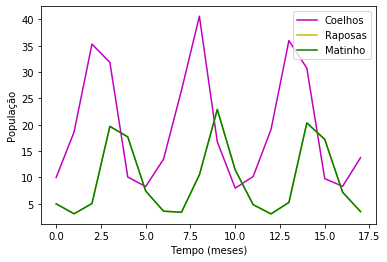

In [48]:
plt.plot(sol.t, coelhos, "m", label="Coelhos")
plt.plot(sol.t, raposas, "y", label="Raposas")
plt.plot(sol.t, raposas, "g", label="Matinho")
plt.xlabel("Tempo (meses)")
plt.ylabel("População")
plt.legend();
plt.show()